Employee Churn Analysis - 2

Refernce https://www.datacamp.com/community/tutorials/predicting-employee-churn-python

Refernce: 
Data Preparation: https://www.datacamp.com/courses/foundations-of-predictive-analytics-in-python-part-2
Model and Evaluation: https://www.datacamp.com/courses/foundations-of-predictive-analytics-in-python-part-1


Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

Importing Modules

In [123]:
#import modules

#import libraries for data handling
import os
import pandas as pd # for dataframes
import numpy as np

#import for visualization
import seaborn as sns # for plotting graphs
import matplotlib
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

#import for Linear regression
from sklearn.linear_model import LinearRegression

Loading Dataset

Let's first load the required HR dataset using pandas's read CSV function. You can download the data from this link.

In [3]:
basetable1 = pd.read_csv('HR_comma_sep.csv')

In [124]:
basetable1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


After you have loaded the dataset, you might want to know a little bit more about it. You can check attributes names and datatypes using info().

In [125]:
basetable1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
target                   14999 non-null int64
promotion_last_5years    14999 non-null int64
departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.
You can describe 10 attributes in detail as:

satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
number_projects: How many numbers of projects assigned to an employee?
average_monthly_hours: How many average numbers of hours worked by an employee in a month?
time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
work_accident: Whether an employee has had a work accident or not.
promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
Departments: Employee's working department/division.
Salary: Salary level of the employee such as low, medium and high.
left: Whether the employee has left the company or not.

Data Insights

Rename the columns for consistency

In [6]:
basetable1 = basetable1.rename(columns={'left': 'target', 'Work_accident': 'work_accident'})

In [13]:
basetable1 = basetable1.rename(columns={'Departments ': 'departments'})

In [16]:
basetable1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
target                   14999 non-null int64
promotion_last_5years    14999 non-null int64
departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
target = basetable1.groupby('target')
target.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
target,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can interpret, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.



In [17]:
target.count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
target,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [18]:
target.median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
target,,,,,,,
0,0.69,0.71,4,198,3,0,0
1,0.41,0.79,4,224,4,0,0


The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [19]:
salary_groups = basetable1.groupby('salary')
salary_groups.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [20]:
workaccident_groups = basetable1.groupby('work_accident')
workaccident_groups.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,target,promotion_last_5years
work_accident,,,,,,,
0,0.606833,0.716602,3.805456,201.258613,3.496960,0.265160,0.018940
1,0.648326,0.713144,3.788843,199.818349,3.505763,0.077916,0.035039


In [21]:
departments_groups = basetable1.groupby('departments')
departments_groups.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years
departments,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [22]:
basetable1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Data Visualization

In [126]:
corr = basetable2.corr().head(7).tail(1)
print(corr)
corr.sort_values(by='target',axis=1)

        satisfaction_level  last_evaluation  number_project  \
target           -0.388375         0.006567        0.023787   

        average_montly_hours  time_spend_company  work_accident  target  \
target              0.071287            0.144822      -0.154622     1.0   

        promotion_last_5years       low    medium     RandD  accounting  \
target              -0.061788  0.134722 -0.068833 -0.046596    0.015201   

              hr  management  marketing  product_mng     sales  support  \
target  0.028249   -0.046035  -0.000859    -0.011029  0.009923   0.0107   

        technical  
target   0.020076  


,satisfaction_level,work_accident,medium,promotion_last_5years,RandD,management,product_mng,marketing,last_evaluation,sales,support,accounting,technical,number_project,hr,average_montly_hours,low,time_spend_company,target
target,-0.388375,-0.154622,-0.068833,-0.061788,-0.046596,-0.046035,-0.011029,-0.000859,0.006567,0.009923,0.0107,0.015201,0.020076,0.023787,0.028249,0.071287,0.134722,0.144822,1.0


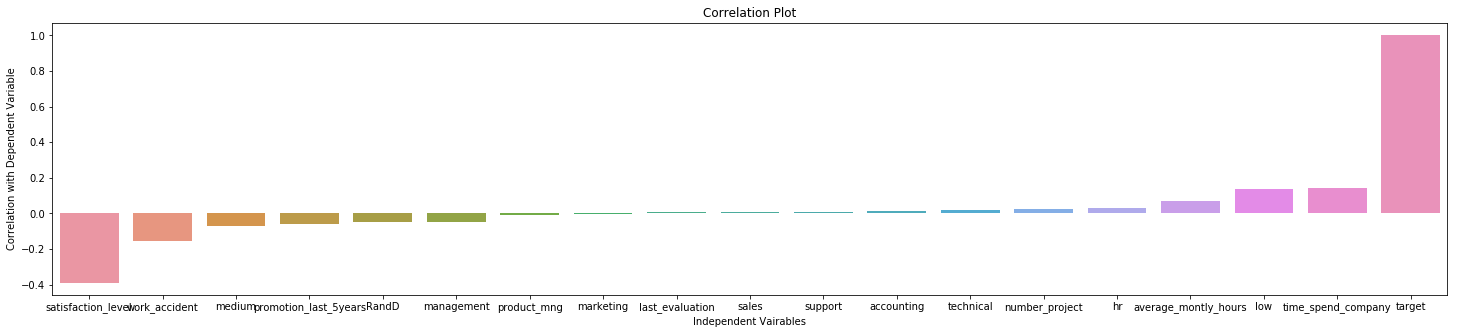

In [120]:

fig, ax = plt.subplots(figsize=(25,5))

plt.title("Correlation Plot")
plt.xlabel("Independent Vairables")
plt.ylabel("Correlation with Dependent Variable")

ax = sns.barplot(data=corr.sort_values(by='target',axis=1))

Top reasons to leave the company are:
    1. time spend in company
    2. low salary
    3. average monthly hours
Top 4 Safe Employee to retain are:
    1.more satisfacion level
    2. suprisingly more accidents
    3. medium salary are safest
    4. Promotion certainly helps in retaining

Employees Left
Let's check how many employees were left?

Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

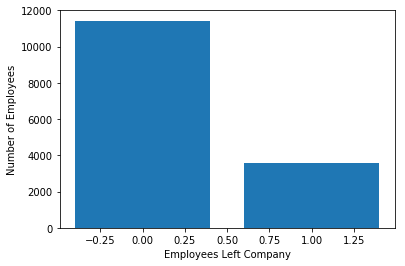

In [23]:
left_count=basetable1.groupby('target').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [25]:
left_count = basetable1.target.value_counts()
total = len(basetable1)

percent_left = (left_count*100)/total

print(left_count)
print(total)
print(percent_left)

0    11428
1     3571
Name: target, dtype: int64
14999
0    76.191746
1    23.808254
Name: target, dtype: float64


Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

Number of Projects
Similarly, you can also plot a bar graph to count the number of employees deployed on How many projects?

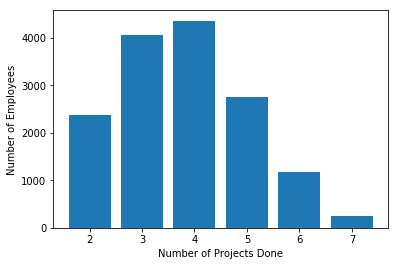

In [26]:
number_project_count=basetable1.groupby('number_project').count()
plt.bar(number_project_count.index.values, number_project_count['satisfaction_level'])
plt.xlabel('Number of Projects Done')
plt.ylabel('Number of Employees')
plt.show()

Most of the employees are doing the project from 3-5.

Time Spent in Company
Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

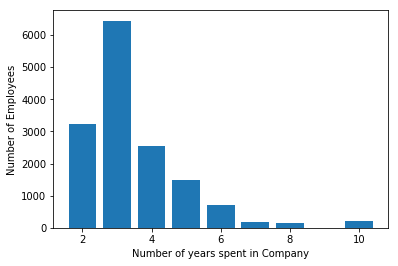

In [27]:
time_spend_company_count=basetable1.groupby('time_spend_company').count()
plt.bar(time_spend_company_count.index.values, time_spend_company_count['satisfaction_level'])
plt.xlabel('Number of years spent in Company')
plt.ylabel('Number of Employees')
plt.show()

Subplots using Seaborn
This is how you can analyze the features one by one, but it will be time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

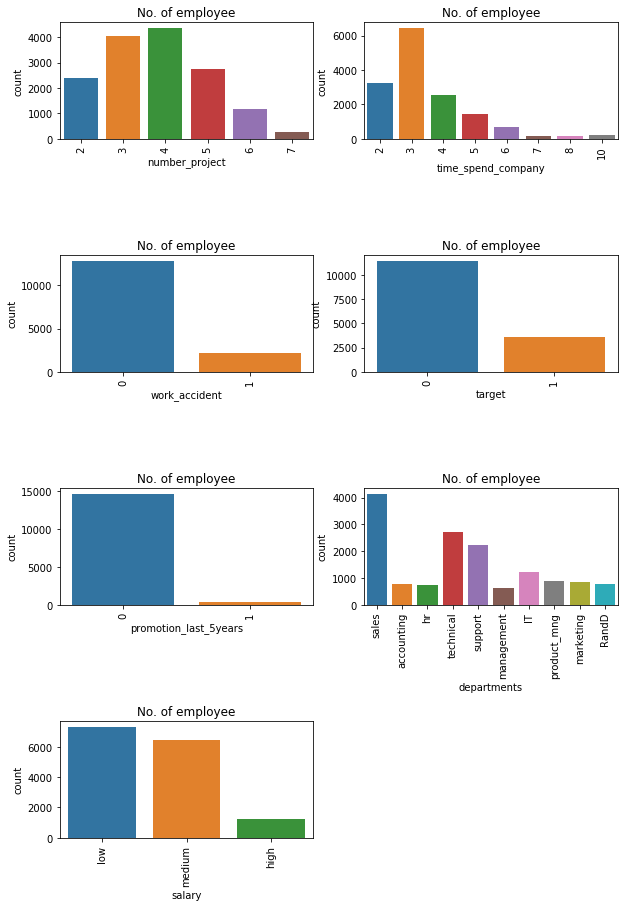

In [28]:
features=['number_project','time_spend_company','work_accident','target', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = basetable1)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

Most of the employee is doing the project from 3-5.
There is a huge drop between 3 years and 4 years experienced employee.
The no of employee left is 23 % of the total employment.
A decidedly less number of employee get the promotion in the last 5 year.
The sales department is having maximum no.of employee followed by technical and support
Most of the employees are getting salary either medium or low.

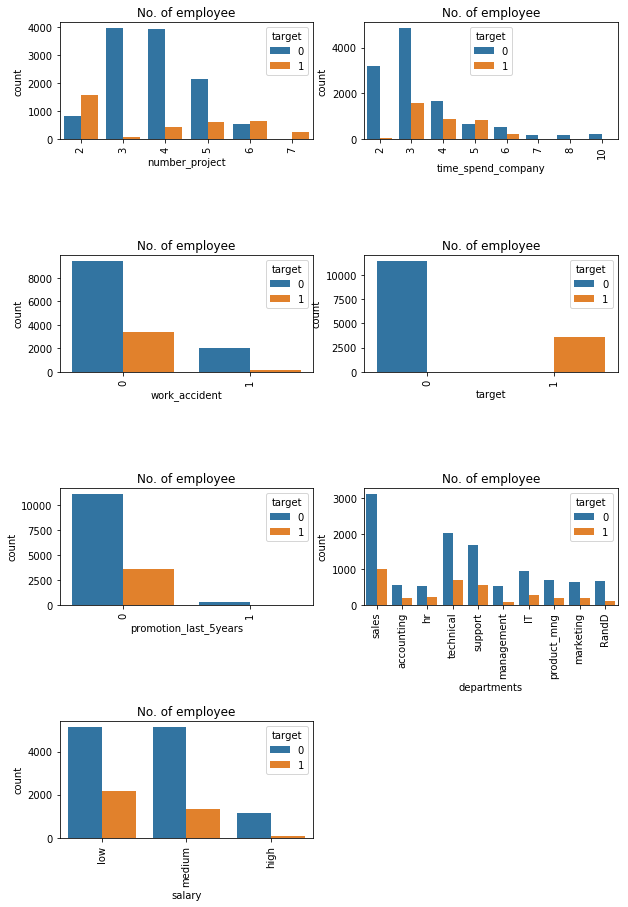

In [29]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = basetable1, hue='target')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

Those employees who have the number of projects more than 5 were left the company.
The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

Data Analysis and Visualization Summary:
Following features are most influencing a person to leave the company:

Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
Salary: Most of the employees that quit among the mid or low salary groups.

Cluster Analysis:
Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [30]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  basetable1[['satisfaction_level', 'last_evaluation']][basetable1.target == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

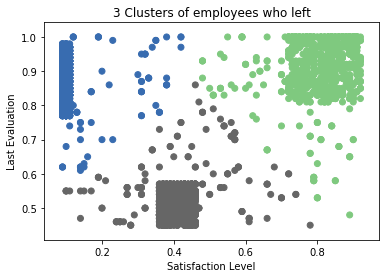

In [31]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

Building a Prediction Model

Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.

This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [47]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
basetable1['salary']=le.fit_transform(data['salary'])
basetable1['Departments ']=le.fit_transform(data['Departments '])
# skipping label encoding for this model. I will prefer to use DUmmy variables

Here, you imported preprocessing module and created Label Encoder object. Using this LabelEncoder object you fit and transform "salary" and "Departments " column into numeric column.

In [50]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [127]:
# Create the dummy variable
dummies_salary = pd.get_dummies(basetable1["salary"], drop_first = True)

# Add the dummy variable to the basetable
basetable2 = pd.concat([basetable1, dummies_salary], axis = 1)

# Delete the original variable from the basetable
del basetable2["salary"]
#print(basetable1.head())
print(basetable2.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  target  promotion_last_5years  \
0                   3              0       1                      0   
1                   6              0       1                      0   
2                   4              0       1                      0   
3                   5              0       1                      0   
4                   3              0       1                      0   

  departments  low  medium  
0       sales    1       0  
1       sales    0       1  
2    

Salary is added as dummy variables. removed High to avoid multicolinearity.

In [33]:
# Create the dummy variable
dummies_departments = pd.get_dummies(basetable2["departments"], drop_first = True)



In [34]:
# Add the dummy variable to the basetable
basetable2 = pd.concat([basetable2, dummies_departments], axis = 1)

# Delete the original variable from the basetable
del basetable2["departments"]
#print(basetable1.head())
print(basetable2.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  target  promotion_last_5years  low  \
0                   3              0       1                      0    1   
1                   6              0       1                      0    0   
2                   4              0       1                      0    0   
3                   5              0       1                      0    1   
4                   3              0       1                      0    1   

   medium  RandD  accounting  hr  management  marketing  produ

In [35]:
print(basetable2["satisfaction_level"].isna().sum())

0


In [40]:
basetable2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
target                   14999 non-null int64
promotion_last_5years    14999 non-null int64
low                      14999 non-null uint8
medium                   14999 non-null uint8
RandD                    14999 non-null uint8
accounting               14999 non-null uint8
hr                       14999 non-null uint8
management               14999 non-null uint8
marketing                14999 non-null uint8
product_mng              14999 non-null uint8
sales                    14999 non-null uint8
support                  14999 non-null uint8
technical                14999 non-null uint8
dtypes: float

In [56]:
features=['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company','work_accident','target', 'promotion_last_5years','low','medium','RandD','accounting', 'hr', 'management','marketing','product_mng','sales','support', 'technical']
missing_values = pd.DataFrame(features)
print(missing_values)

for v in features:
    #print(v)
    n = basetable2[v].isna().sum()
    print(n)
    #print(basetable2[v].isna().sum())
    #print(basetable2[i].isna().sum())
    #missing = basetable2[i].isna().sum()
    #print(missing)
    #missing_value["feature"] = i
    #missing_values["missing_count"] = missing

#missing_n = pd.DataFrame(n) 
#print(missing_df)

#missing_values = pd.concat([missing_values, missing_n], axis=1)
#print(missing_values)
# Concatenating 2 df did not work properly

                        0
0      satisfaction_level
1         last_evaluation
2          number_project
3    average_montly_hours
4      time_spend_company
5           work_accident
6                  target
7   promotion_last_5years
8                     low
9                  medium
10                  RandD
11             accounting
12                     hr
13             management
14              marketing
15            product_mng
16                  sales
17                support
18              technical
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [57]:
basetable2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Split Train and Test Set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [128]:
#Spliting data into Feature and
X=basetable2[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'low', 'medium', 'RandD','accounting','hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']]
y=basetable2['target']

KeyError: "['RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng' 'sales'\n 'support' 'technical'] not in index"

In [129]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [130]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
12602,0.10,0.84,7,250,4,0,0,1,0,0,0,0,0,0,1,0,0,0
4889,0.57,0.68,4,154,3,1,0,0,1,0,0,0,1,0,0,0,0,0
1572,0.39,0.48,2,154,3,0,0,1,0,0,0,0,0,0,0,0,0,1
13375,0.91,0.68,4,132,4,0,0,0,1,0,0,0,0,0,0,0,0,0
879,0.82,0.97,5,263,5,0,0,0,1,0,0,0,0,0,0,0,0,1


Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

Model Building
Let's build employee an churn prediction model.

Here, you are going to predict churn using Gradient Boosting Classifier.

First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [131]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

Evaluating Model Performance

In [132]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9724444444444444
Precision: 0.9610894941634242
Recall: 0.9216417910447762


Well, you got a classification rate of 97%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% of the time.

Recall: If there is an employee who left present in the test set and your Gradient Boosting model can identify it 92% of the time.

try confusion matrix

In [59]:
#Try Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7831111111111111


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Low acccuracy with Logistic Regression

In [99]:
import numpy as np
# Import the linear_model and roc_auc_score modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
#roc_auc_score(true_target, prob_target)
# function to calculate AUC

def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)

In [134]:
auc = auc(["satisfaction_level", "promotion_last_5years"], ["target"], basetable2)
print(round(auc,2))

0.75


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
 #Consider two sets of variables
variables_1 = ["satisfaction_level", "promotion_last_5years"]
variables_2 = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "work_accident","promotion_last_5years", "low", "medium", "RandD","accounting","hr", "management", "marketing", "product_mng", "sales", "support", "technical"]

# Make predictions using the first set of variables and assign the AUC to auc_1
X_1 = basetable2[variables_1]
Y = basetable2[["target"]]
logreg = linear_model.LogisticRegression()
logreg.fit(X_1, Y)
predictions_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(Y, predictions_1)

# Make predictions using the second set of variables and assign the AUC to auc_2
X_2 = basetable2[variables_2]
logreg.fit(X_2, Y)
predictions_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(Y, predictions_2)

# Print auc_1 and auc_2
print(round(auc_1,2))
print(round(auc_2,2))

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyError: "['RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng' 'sales'\n 'support' 'technical'] not in index"

Only 2 variable result in 0.75 and all the variables results in 

In [136]:
def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
	# Calculate the auc score of adding v to the current variables
    for c in candidate_variables:
        auc_v = auc(current_variables + [c],target, basetable)
        print(auc_v)
        
		# Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = c
            
    return best_variable

In [137]:
current_variables = ["satisfaction_level", "promotion_last_5years"]
candidate_variables = ["number_project", "average_montly_hours", "time_spend_company"]

#print(c)

# Try next_best to get the best predicitve variable among gender_F and age
next_variable = next_best(current_variables, candidate_variables, ["target"], basetable2)
print(next_variable)



TypeError: 'numpy.float64' object is not callable

In [107]:
#The forward stepwise variable selection procedure

candidate_variables = list(basetable2.columns.values)
candidate_variables.remove("target")
current_variables = []
target = ["target"]

max_number_variables = 10
number_iterations = min(max_number_variables, len(candidate_variables))

for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, basetable2)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)

# Make predictions using the first set of variables and assign the AUC to auc_1
X_3 = basetable2[current_variables]
Y = basetable2[["target"]]
logreg = linear_model.LogisticRegression()
logreg.fit(X_3, Y)
predictions_3 = logreg.predict_proba(X_3)[:,1]
auc_3 = roc_auc_score(Y, predictions_3)

# Make predictions using the second set of variables and assign the AUC to auc_2
#X_2 = basetable2[variables_2]
#logreg.fit(X_2, Y)
#predictions_2 = logreg.predict_proba(X_2)[:,1]
#auc_2 = roc_auc_score(Y, predictions_2)

# Print auc_1 and auc_2
#print(round(auc_1,2))
print(round(auc_3,2))

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

['satisfaction_level', 'time_spend_company', 'work_accident', 'low', 'medium', 'promotion_last_5years', 'number_project', 'average_montly_hours', 'last_evaluation', 'management']
0.82


Best Variable slected by Forward selection process
['satisfaction_level', 'time_spend_company', 'work_accident', 'low', 'medium', 'promotion_last_5years', 'number_project', 'average_montly_hours', 'last_evaluation', 'management']

Best AUC score  = 0.82

looks like it has ignored the department. this concurs with the corelation with target variable. deprtments have least correlation.

We conclude are model here.

In [122]:
#  Partitioning 

from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'